### Install desigal package (assuming all other desi packages are installed)

In [1]:
## Installation for use
# !pip install --user git+https://github.com/desihub/desigal.git#egg=desigal

In [2]:
# # installation for development
# !git clone https://github.com/desihub/desigal
# %cd ../..
# !pip install --user --editable .

In [2]:
%load_ext autoreload
%autoreload 2

# Tutorial on stacking many DESI spectra and saving the stacks


In [4]:
import sys

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
#import desigal.specutils

# To be removed later. Notebook created before updates are on the main desigal version.
sys.path.insert(0,'../../py')
import desigal.specutils 

### Start with your favorite target ids

In [5]:
# We specify our targets and target redshifts. Now we specify targets as a 2D array where the 1st dimension separates different stacks.
targets = np.array([[39627757549781521, 39627758099238740, 39627758099238859,
                     39627758099238900, 39627758099238931, 39627758099238954,
                     39627763589580784, 39627763589580845, 39627763589581033,
                     39627763589581231, 39627763589581368, 39627763589581441,
                     39627763589581458, 39627770296276438, 39627775715316324,
                     39627776264767718, 39627776264767836, 39627776264767942,
                     39627776264768321, 39627776264768455],
                    [39627733935850977, 39627733986182919, 39627734002962702,
                     39627734053290437, 39627734057488720, 39627739963067940,
                     39627739963068401, 39627739963068532, 39627739971454580,
                     39627739975648525, 39627739979842315, 39627739979846602,
                     39627739984041008, 39627739988233491, 39627739992425384,
                     39627739992425596, 39627740021789546, 39627740030174973,
                     39627740034372667, 39627740042761616]])
z_targets = np.array([[0.00549467, 0.00478984, 0.00488709, 0.00545382, 0.00549349,
                       0.00545548, 0.00442916, 0.00438678, 0.00492025, 0.00542517,
                       0.00478803, 0.00476095, 0.00506013, 0.00611871, 0.00386091,
                       0.00545443, 0.0054151 , 0.00540271, 0.00533975, 0.00535535],
                      [0.16558725, 0.12689658, 0.12684531, 0.13816829, 0.1404767 ,
                       0.15193659, 0.15115597, 0.15135542, 0.13045069, 0.13771661,
                       0.11968457, 0.13789992, 0.15994504, 0.14996304, 0.12467965,
                       0.14920402, 0.13148009, 0.13882322, 0.14609249, 0.13914802]])

### Stack the spectra

In [15]:
n_stacks = len(targets)

# Specify the wavelength grid
wave_new = np.arange(3000,9800, step=0.4)

# Specify flux, ivar arrays to save the stacks
stacked_flux = np.zeros((n_stacks, len(wave_new)))
stacked_ivar = np.zeros((n_stacks, len(wave_new)))

# Create the stacks
for i in range(n_stacks):
    targetid_list = [int(target) for target in targets[i]]
    redshift = z_targets[i]
        
    spectra = desigal.specutils.get_spectra(targetid_list, release="fuji", n_workers=6, use_db = True)
    
    stacked_spectrum, stack_wave = desigal.specutils.stack.stack_spectra(
                                    spectra,
                                    redshift=redshift,
                                    norm_method = "flux-window", #"mean", "median", "flux-window"
                                    norm_flux_window=[4000,4050],
                                    resample_method = "linear",
                                    stack_method = "ivar-weighted-mean", #median , ivar
                                    n_workers = 6,
                                    output_wave_grid=wave_new,
                                    bootstrap=True
                                   )
    
    if np.all(stacked_flux == None):
        stacked_flux = np.zeros((n_stacks, len(stack_wave)))
        stacked_ivar = np.zeros((n_stacks, len(stack_wave)))

    stacked_flux[i] = stacked_spectrum[0]
    stacked_ivar[i] = stacked_spectrum[1]
    
    stacked_flux[np.isnan(stacked_flux)|np.isnan(stacked_ivar)] = 0.0
    stacked_ivar[np.isnan(stacked_flux)|np.isnan(stacked_ivar)] = 0.0

/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/255/25597/coadd-sv3-bright-25597.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.139 sec to read coadd-sv3-bright-25597.fits at 2024-01-24T02:44:31.201282
/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/255/25597/coadd-sv3-bright-25597.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.145 sec to read coadd-sv3-bright-25597.fits at 2024-01-24T02:44:31.207486
/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/255/25597/coadd-sv3-bright-25597.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.146 sec to read coadd-sv3-bright-25597.fits at 2024-01-24T02:44:31.207523
/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/255/25596/coadd-sv3-bright-25596.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.188 sec to read coadd-sv3-bright-25596.fits at 2024-01-24T02:44:31.249516
/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/259/25918/coadd-sv3-bright-2591

2024-01-24 02:44:31,201 desiutil.log.dlm58.info INFO : iotime 0.139 sec to read coadd-sv3-bright-25597.fits at 2024-01-24T02:44:31.201282
2024-01-24 02:44:31,207 desiutil.log.dlm58.info INFO : iotime 0.145 sec to read coadd-sv3-bright-25597.fits at 2024-01-24T02:44:31.207486
2024-01-24 02:44:31,207 desiutil.log.dlm58.info INFO : iotime 0.146 sec to read coadd-sv3-bright-25597.fits at 2024-01-24T02:44:31.207523
2024-01-24 02:44:31,249 desiutil.log.dlm58.info INFO : iotime 0.188 sec to read coadd-sv3-bright-25596.fits at 2024-01-24T02:44:31.249516
2024-01-24 02:44:31,376 desiutil.log.dlm58.info INFO : iotime 0.122 sec to read coadd-sv3-bright-25918.fits at 2024-01-24T02:44:31.376658
2024-01-24 02:44:31,376 desiutil.log.dlm58.info INFO : iotime 0.160 sec to read coadd-sv3-bright-25918.fits at 2024-01-24T02:44:31.376737


/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/259/25918/coadd-sv3-bright-25918.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.076 sec to read coadd-sv3-bright-25918.fits at 2024-01-24T02:44:31.460037
/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/259/25918/coadd-sv3-bright-25918.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.072 sec to read coadd-sv3-bright-25918.fits at 2024-01-24T02:44:31.461900
/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/259/25918/coadd-sv3-bright-25918.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.025 sec to read coadd-sv3-bright-25918.fits at 2024-01-24T02:44:31.490849


2024-01-24 02:44:31,460 desiutil.log.dlm58.info INFO : iotime 0.076 sec to read coadd-sv3-bright-25918.fits at 2024-01-24T02:44:31.460037
2024-01-24 02:44:31,461 desiutil.log.dlm58.info INFO : iotime 0.072 sec to read coadd-sv3-bright-25918.fits at 2024-01-24T02:44:31.461900
2024-01-24 02:44:31,490 desiutil.log.dlm58.info INFO : iotime 0.025 sec to read coadd-sv3-bright-25918.fits at 2024-01-24T02:44:31.490849


/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/255/25599/coadd-sv3-bright-25599.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.632 sec to read coadd-sv3-bright-25599.fits at 2024-01-24T02:44:31.695410
/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/255/25599/coadd-sv3-bright-25599.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.494 sec to read coadd-sv3-bright-25599.fits at 2024-01-24T02:44:31.700134
/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/255/25599/coadd-sv3-bright-25599.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.492 sec to read coadd-sv3-bright-25599.fits at 2024-01-24T02:44:31.704181
/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/255/25599/coadd-sv3-bright-25599.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.668 sec to read coadd-sv3-bright-25599.fits at 2024-01-24T02:44:31.731867
/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/259/25960/coadd-sv3-bright-2596

2024-01-24 02:44:31,695 desiutil.log.dlm58.info INFO : iotime 0.632 sec to read coadd-sv3-bright-25599.fits at 2024-01-24T02:44:31.695410
2024-01-24 02:44:31,700 desiutil.log.dlm58.info INFO : iotime 0.494 sec to read coadd-sv3-bright-25599.fits at 2024-01-24T02:44:31.700134
2024-01-24 02:44:31,704 desiutil.log.dlm58.info INFO : iotime 0.492 sec to read coadd-sv3-bright-25599.fits at 2024-01-24T02:44:31.704181
2024-01-24 02:44:31,731 desiutil.log.dlm58.info INFO : iotime 0.668 sec to read coadd-sv3-bright-25599.fits at 2024-01-24T02:44:31.731867
2024-01-24 02:44:31,864 desiutil.log.dlm58.info INFO : iotime 0.158 sec to read coadd-sv3-bright-25960.fits at 2024-01-24T02:44:31.864638
2024-01-24 02:44:31,865 desiutil.log.dlm58.info INFO : iotime 0.165 sec to read coadd-sv3-bright-25960.fits at 2024-01-24T02:44:31.865430


/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/259/25961/coadd-sv3-bright-25961.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.170 sec to read coadd-sv3-bright-25961.fits at 2024-01-24T02:44:31.909734
/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/259/25961/coadd-sv3-bright-25961.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.198 sec to read coadd-sv3-bright-25961.fits at 2024-01-24T02:44:31.910286
/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/259/25960/coadd-sv3-bright-25960.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.561 sec to read coadd-sv3-bright-25960.fits at 2024-01-24T02:44:32.057370
/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/259/25933/coadd-sv3-bright-25933.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.585 sec to read coadd-sv3-bright-25933.fits at 2024-01-24T02:44:32.058551


2024-01-24 02:44:31,909 desiutil.log.dlm58.info INFO : iotime 0.170 sec to read coadd-sv3-bright-25961.fits at 2024-01-24T02:44:31.909734
2024-01-24 02:44:31,910 desiutil.log.dlm58.info INFO : iotime 0.198 sec to read coadd-sv3-bright-25961.fits at 2024-01-24T02:44:31.910286
2024-01-24 02:44:32,057 desiutil.log.dlm58.info INFO : iotime 0.561 sec to read coadd-sv3-bright-25960.fits at 2024-01-24T02:44:32.057370
2024-01-24 02:44:32,058 desiutil.log.dlm58.info INFO : iotime 0.585 sec to read coadd-sv3-bright-25933.fits at 2024-01-24T02:44:32.058551


/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/262/26275/coadd-sv3-bright-26275.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.355 sec to read coadd-sv3-bright-26275.fits at 2024-01-24T02:44:32.225585


2024-01-24 02:44:32,225 desiutil.log.dlm58.info INFO : iotime 0.355 sec to read coadd-sv3-bright-26275.fits at 2024-01-24T02:44:32.225585
/global/u2/d/dscholte/forked_packages/desigal/doc/nb/../../py/desigal/specutils/coadd_cameras.py:78: RuntimeWarning: invalid value encountered in true_divide
  flux = flux / ivar
/global/u2/d/dscholte/forked_packages/desigal/doc/nb/../../py/desigal/specutils/coaddition.py:115: RuntimeWarning: Mean of empty slice
  return np.nanmean(boot_averages[:,:,0], axis=0), np.nanmean(boot_averages[:,:,1], axis=0)


/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/259/25911/coadd-sv3-bright-25911.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.128 sec to read coadd-sv3-bright-25911.fits at 2024-01-24T02:44:34.452729
/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/259/25913/coadd-sv3-bright-25913.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.152 sec to read coadd-sv3-bright-25913.fits at 2024-01-24T02:44:34.476361
/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/259/25913/coadd-sv3-bright-25913.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.152 sec to read coadd-sv3-bright-25913.fits at 2024-01-24T02:44:34.476358
/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/259/25913/coadd-sv3-bright-25913.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.023 sec to read coadd-sv3-bright-25913.fits at 2024-01-24T02:44:34.482668
/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/259/25913/coadd-sv3-bright-2591

2024-01-24 02:44:34,452 desiutil.log.dlm58.info INFO : iotime 0.128 sec to read coadd-sv3-bright-25911.fits at 2024-01-24T02:44:34.452729
2024-01-24 02:44:34,476 desiutil.log.dlm58.info INFO : iotime 0.152 sec to read coadd-sv3-bright-25913.fits at 2024-01-24T02:44:34.476361
2024-01-24 02:44:34,476 desiutil.log.dlm58.info INFO : iotime 0.152 sec to read coadd-sv3-bright-25913.fits at 2024-01-24T02:44:34.476358
2024-01-24 02:44:34,482 desiutil.log.dlm58.info INFO : iotime 0.023 sec to read coadd-sv3-bright-25913.fits at 2024-01-24T02:44:34.482668
2024-01-24 02:44:34,503 desiutil.log.dlm58.info INFO : iotime 0.179 sec to read coadd-sv3-bright-25913.fits at 2024-01-24T02:44:34.503766


/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/259/25909/coadd-sv3-bright-25909.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.365 sec to read coadd-sv3-bright-25909.fits at 2024-01-24T02:44:34.689147
/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/259/25909/coadd-sv3-bright-25909.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.365 sec to read coadd-sv3-bright-25909.fits at 2024-01-24T02:44:34.689188
/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/259/25915/coadd-sv3-bright-25915.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.297 sec to read coadd-sv3-bright-25915.fits at 2024-01-24T02:44:34.800100
/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/259/25916/coadd-sv3-bright-25916.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.097 sec to read coadd-sv3-bright-25916.fits at 2024-01-24T02:44:34.800406
/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/259/25915/coadd-sv3-bright-2591

2024-01-24 02:44:34,689 desiutil.log.dlm58.info INFO : iotime 0.365 sec to read coadd-sv3-bright-25909.fits at 2024-01-24T02:44:34.689147
2024-01-24 02:44:34,689 desiutil.log.dlm58.info INFO : iotime 0.365 sec to read coadd-sv3-bright-25909.fits at 2024-01-24T02:44:34.689188
2024-01-24 02:44:34,800 desiutil.log.dlm58.info INFO : iotime 0.297 sec to read coadd-sv3-bright-25915.fits at 2024-01-24T02:44:34.800100
2024-01-24 02:44:34,800 desiutil.log.dlm58.info INFO : iotime 0.097 sec to read coadd-sv3-bright-25916.fits at 2024-01-24T02:44:34.800406
2024-01-24 02:44:34,800 desiutil.log.dlm58.info INFO : iotime 0.303 sec to read coadd-sv3-bright-25915.fits at 2024-01-24T02:44:34.800605
2024-01-24 02:44:34,800 desiutil.log.dlm58.info INFO : iotime 0.104 sec to read coadd-sv3-bright-25915.fits at 2024-01-24T02:44:34.800933


/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/259/25916/coadd-sv3-bright-25916.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.083 sec to read coadd-sv3-bright-25916.fits at 2024-01-24T02:44:34.889962
/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/259/25916/coadd-sv3-bright-25916.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.077 sec to read coadd-sv3-bright-25916.fits at 2024-01-24T02:44:34.889964
/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/259/25915/coadd-sv3-bright-25915.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.448 sec to read coadd-sv3-bright-25915.fits at 2024-01-24T02:44:34.935543
/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/259/25915/coadd-sv3-bright-25915.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.425 sec to read coadd-sv3-bright-25915.fits at 2024-01-24T02:44:34.935528


2024-01-24 02:44:34,890 desiutil.log.dlm58.info INFO : iotime 0.077 sec to read coadd-sv3-bright-25916.fits at 2024-01-24T02:44:34.889964
2024-01-24 02:44:34,890 desiutil.log.dlm58.info INFO : iotime 0.083 sec to read coadd-sv3-bright-25916.fits at 2024-01-24T02:44:34.889962
2024-01-24 02:44:34,935 desiutil.log.dlm58.info INFO : iotime 0.448 sec to read coadd-sv3-bright-25915.fits at 2024-01-24T02:44:34.935543
2024-01-24 02:44:34,935 desiutil.log.dlm58.info INFO : iotime 0.425 sec to read coadd-sv3-bright-25915.fits at 2024-01-24T02:44:34.935528


/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/259/25926/coadd-sv3-bright-25926.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.163 sec to read coadd-sv3-bright-25926.fits at 2024-01-24T02:44:34.981255
/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/259/25932/coadd-sv3-bright-25932.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.487 sec to read coadd-sv3-bright-25932.fits at 2024-01-24T02:44:35.310749


2024-01-24 02:44:34,981 desiutil.log.dlm58.info INFO : iotime 0.163 sec to read coadd-sv3-bright-25926.fits at 2024-01-24T02:44:34.981255
2024-01-24 02:44:35,310 desiutil.log.dlm58.info INFO : iotime 0.487 sec to read coadd-sv3-bright-25932.fits at 2024-01-24T02:44:35.310749


/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/259/25952/coadd-sv3-bright-25952.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.410 sec to read coadd-sv3-bright-25952.fits at 2024-01-24T02:44:35.352602
/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/259/25952/coadd-sv3-bright-25952.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.574 sec to read coadd-sv3-bright-25952.fits at 2024-01-24T02:44:35.475846
/global/cfs/cdirs/desi/spectro/redux/fuji/healpix/sv3/bright/259/25952/coadd-sv3-bright-25952.fits
INFO:spectra_io.py:331:read_single_spectrum: iotime 0.580 sec to read coadd-sv3-bright-25952.fits at 2024-01-24T02:44:35.476752


2024-01-24 02:44:35,352 desiutil.log.dlm58.info INFO : iotime 0.410 sec to read coadd-sv3-bright-25952.fits at 2024-01-24T02:44:35.352602
2024-01-24 02:44:35,475 desiutil.log.dlm58.info INFO : iotime 0.574 sec to read coadd-sv3-bright-25952.fits at 2024-01-24T02:44:35.475846
2024-01-24 02:44:35,476 desiutil.log.dlm58.info INFO : iotime 0.580 sec to read coadd-sv3-bright-25952.fits at 2024-01-24T02:44:35.476752
/global/u2/d/dscholte/forked_packages/desigal/doc/nb/../../py/desigal/specutils/coadd_cameras.py:78: RuntimeWarning: invalid value encountered in true_divide
  flux = flux / ivar
/global/u2/d/dscholte/forked_packages/desigal/doc/nb/../../py/desigal/specutils/coaddition.py:115: RuntimeWarning: Mean of empty slice
  return np.nanmean(boot_averages[:,:,0], axis=0), np.nanmean(boot_averages[:,:,1], axis=0)


### Save the stacks    


In [16]:
# Specify the columns that we want to save along with the stacks
# STACKID and Z are saved separately as they are mandatory columns
table_column_dict = {'TARGETIDS':np.zeros((n_stacks,1)).tolist(), 
                     'TARGET_Z':np.zeros((n_stacks,1)).tolist(), 
                     'NOBJ':np.zeros((n_stacks)).tolist()
                    }
table_format_dict = {'TARGETIDS':'PK()', 
                     'TARGET_Z':'PD()', 
                     'NOBJ':'K'
                    }

desigal.specutils.stack.write_binned_stacks('example_stack.fits', 
                                                  wave_new, 
                                                  stacked_flux, 
                                                  stacked_ivar,
                                                  table_column_dict = table_column_dict,
                                                  table_format_dict = table_format_dict
                                                 )

### Read stacks

In [17]:
stack_file = fits.open('example_stack.fits')

/tmp/ipykernel_952570/1952260059.py:3: RuntimeWarning: divide by zero encountered in power
  plt.fill_between(stack_file[3].data, stack_file[1].data[i]-stack_file[2].data[i]**-0.5, stack_file[1].data[i]+stack_file[2].data[i]**-0.5, alpha=0.3)


Text(0, 0.5, 'Flux')

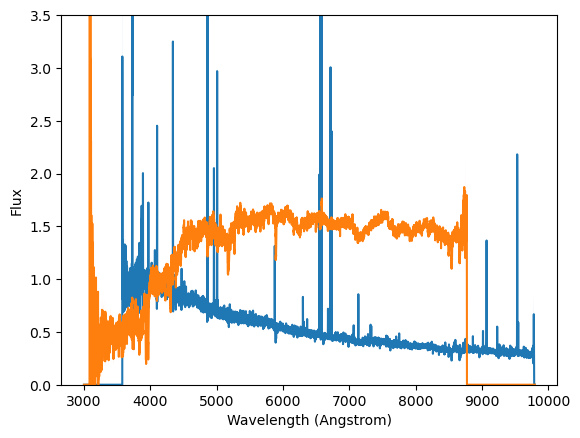

In [18]:
for i in range(2):
    plt.plot(stack_file[3].data, stack_file[1].data[i])
    plt.fill_between(stack_file[3].data, stack_file[1].data[i]-stack_file[2].data[i]**-0.5, stack_file[1].data[i]+stack_file[2].data[i]**-0.5, alpha=0.3)

plt.ylim(0,3.5)
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux')

/tmp/ipykernel_952570/2021534009.py:3: RuntimeWarning: divide by zero encountered in power
  plt.fill_between(stack_file[3].data, stack_file[1].data[i]-stack_file[2].data[i]**-0.5, stack_file[1].data[i]+stack_file[2].data[i]**-0.5, alpha=0.3)


Text(0, 0.5, 'Flux')

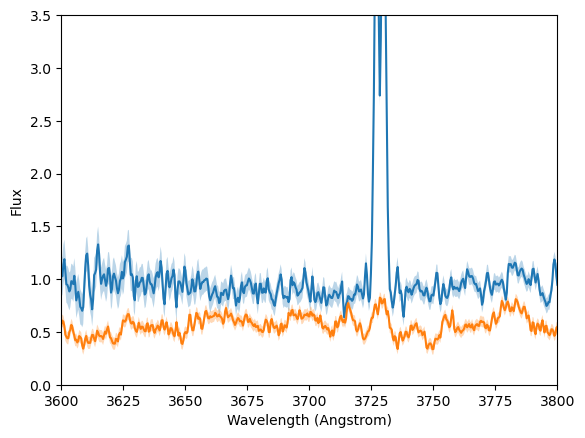

In [22]:
for i in range(2):
    plt.plot(stack_file[3].data, stack_file[1].data[i])
    plt.fill_between(stack_file[3].data, stack_file[1].data[i]-stack_file[2].data[i]**-0.5, stack_file[1].data[i]+stack_file[2].data[i]**-0.5, alpha=0.3)

plt.ylim(0,3.5)
plt.xlim(3600,3800)
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux')